In [1]:
import pandas as pd
import torch
import torch.nn as nn
import scipy.stats as sps
from scipy.interpolate import interp1d
from torch.utils.data import DataLoader
from IPython.display import clear_output
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from tqdm import tqdm
import seaborn as sns
import os
from typing import List
from matplotlib import cm

device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

In [2]:
print(device)

cpu


## Генерация синтетической выборки


In [3]:
c0 = 1
w0 = 0

def u_x(c, c0):
    res = -0.04 * (c - c0)**2 + 1
    if res < 0:
        res = 0
    return res

def usefulness(c, w, noice):
    return u_x(c, c0) * u_x(w, c0)


customer_distribution = sps.norm(0.6, 0.2)
w_distribution = sps.norm(0, 0.4)

epsilon = sps.norm(0, 0.05)


In [4]:
from models.u_predictor import NeuralNetwork, FeedbackDataset
from models.u_predictor import dynamic_system_iterate_u
from models.u_predictor import init_data

In [5]:
start_c_size = 128
start_w_size = 128
z = lambda: epsilon.rvs()
train_data_loader, c_w_distribution = init_data(customer_distribution, w_distribution, start_c_size, start_w_size,
                                                usefulness, z)

In [6]:
loss_func = torch.nn.BCELoss()
model = NeuralNetwork(device, loss_func).to(device)
model.set_optimizer(torch.optim.Adam(model.parameters(), lr=1e-3, betas=(0.9, 0.999)))

model.fit_epoch(train_data_loader)

(0.0005789118586108088, 0.94281005859375)

## Запуск итераций для NN


  0%|          | 0/10 [00:00<?, ?it/s]

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


 10%|█         | 1/10 [00:07<01:07,  7.55s/it]

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


 20%|██        | 2/10 [00:14<00:58,  7.37s/it]

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


 30%|███       | 3/10 [00:21<00:50,  7.20s/it]

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


 40%|████      | 4/10 [00:28<00:43,  7.20s/it]

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


 50%|█████     | 5/10 [00:36<00:35,  7.14s/it]

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


 60%|██████    | 6/10 [00:43<00:28,  7.13s/it]

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


/home/koltastic/MIPT/m1p/2024-Project-144/code/models/u_predictor.py:90: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()
 70%|███████   | 7/10 [00:50<00:21,  7.15s/it]

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


 80%|████████  | 8/10 [00:57<00:14,  7.13s/it]

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


 90%|█████████ | 9/10 [01:04<00:07,  7.09s/it]

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


100%|██████████| 10/10 [01:11<00:00,  7.16s/it]
/tmp/ipykernel_19940/384067213.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


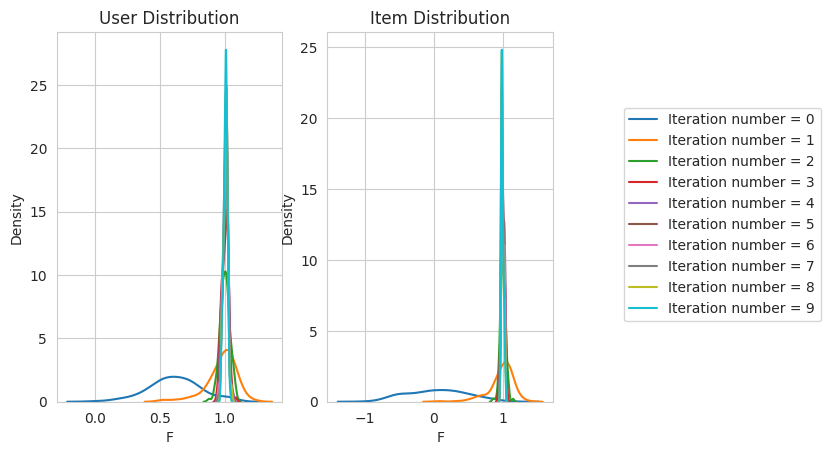

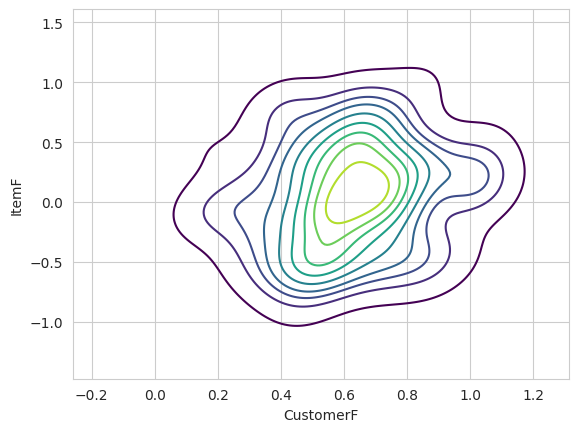

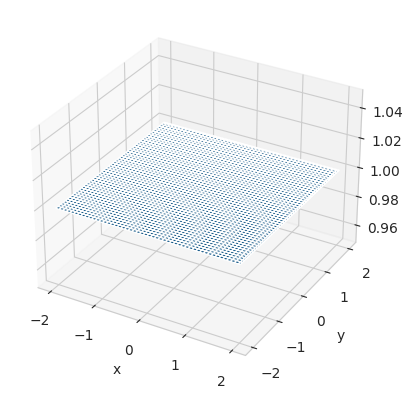

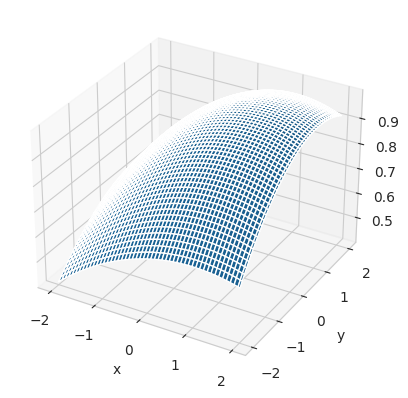

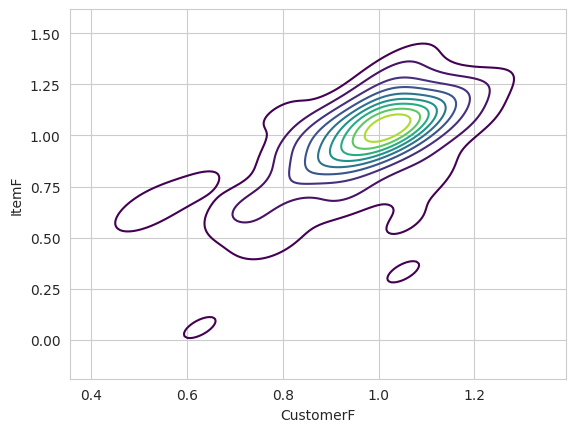

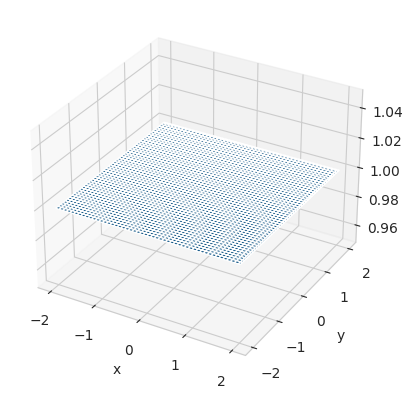

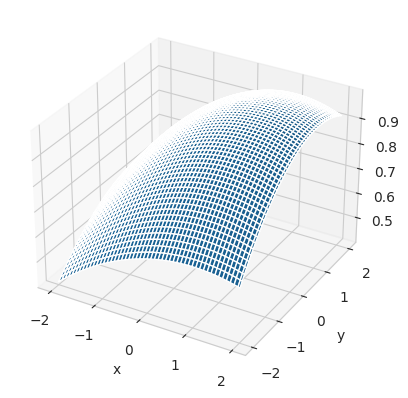

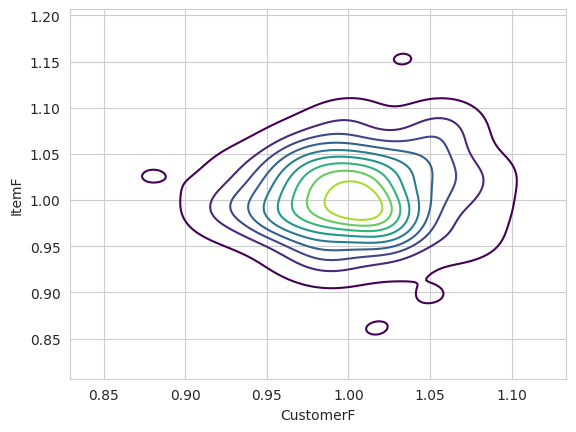

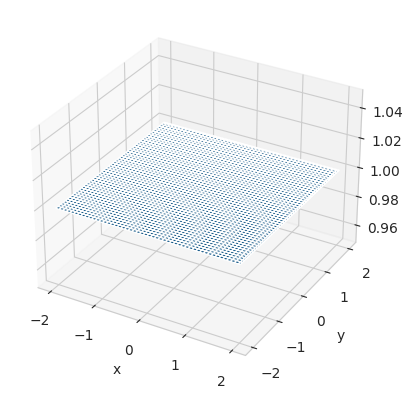

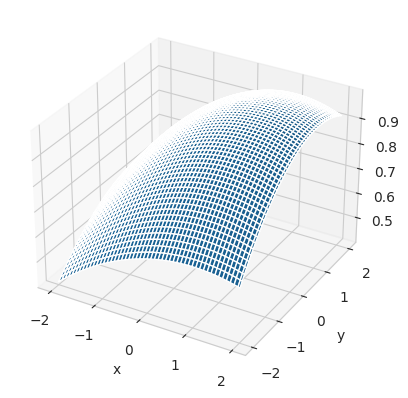

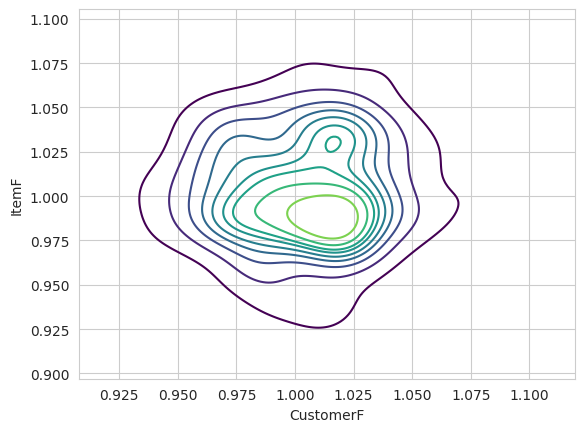

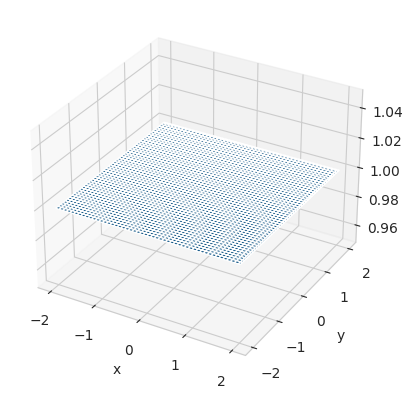

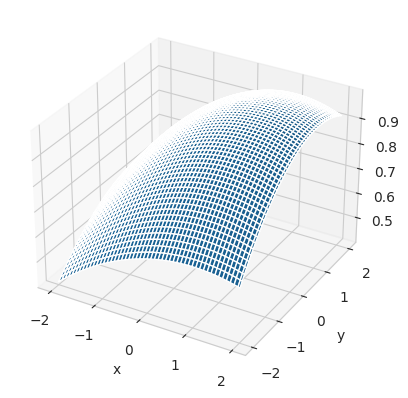

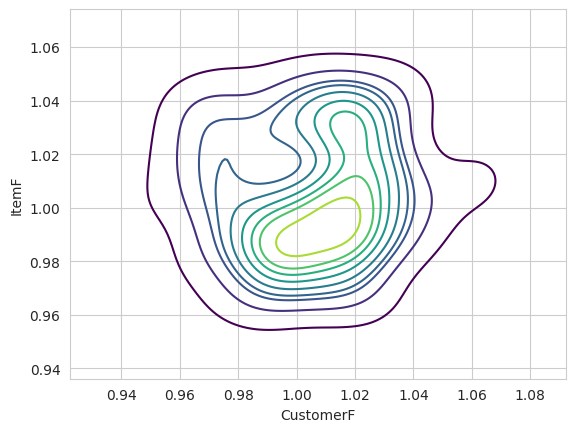

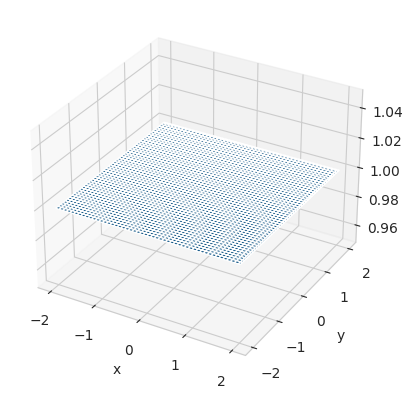

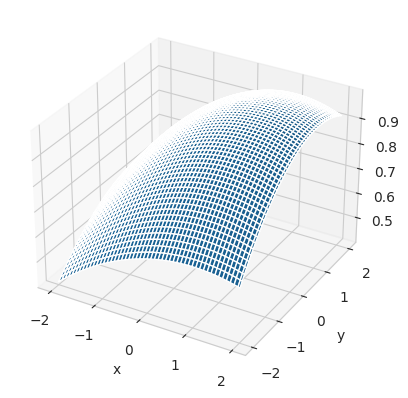

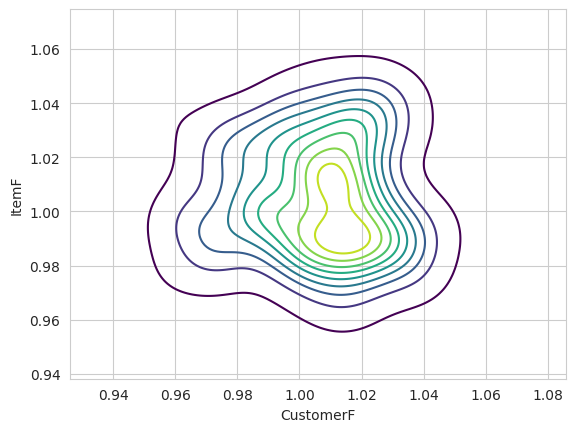

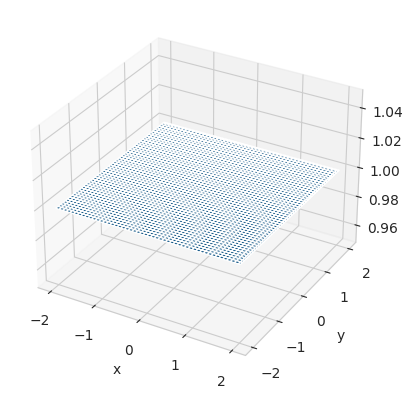

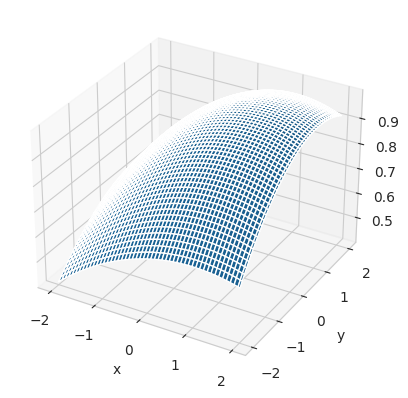

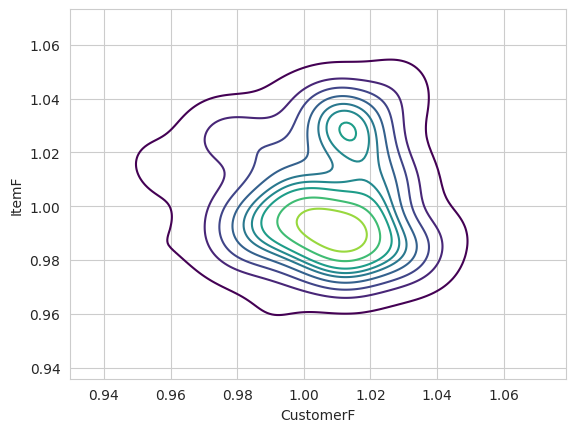

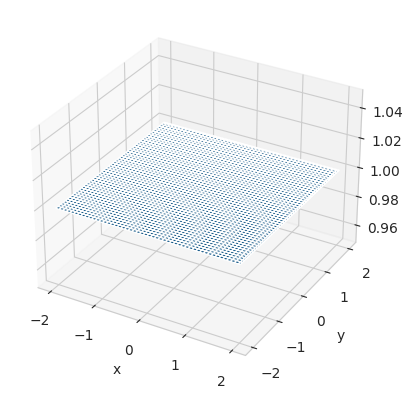

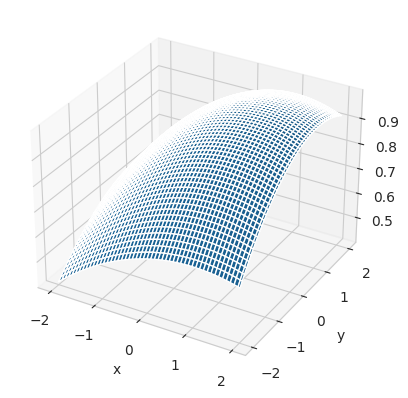

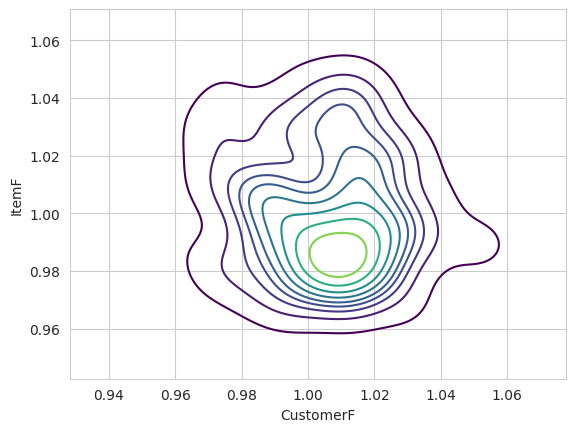

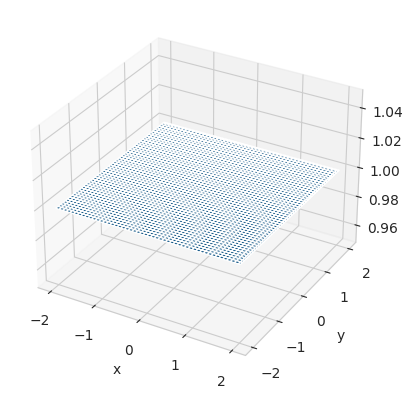

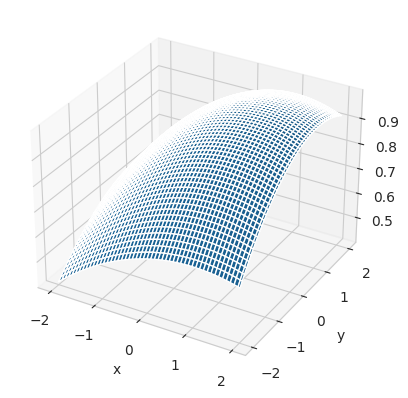

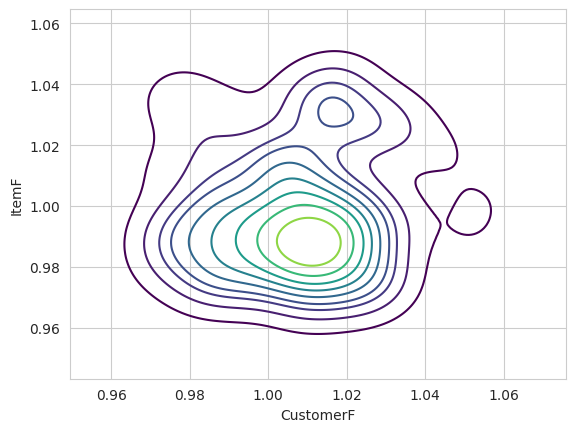

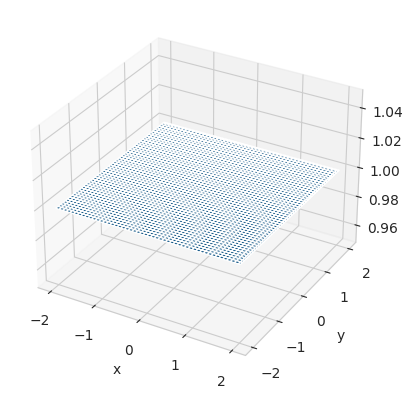

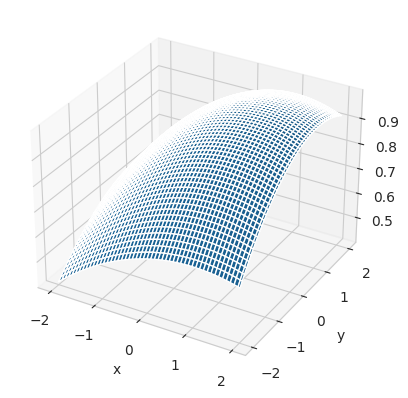

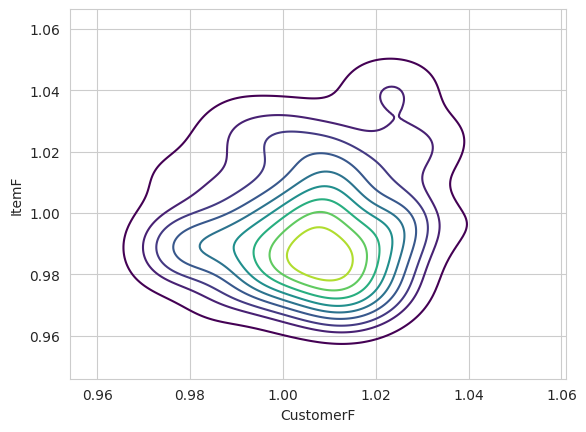

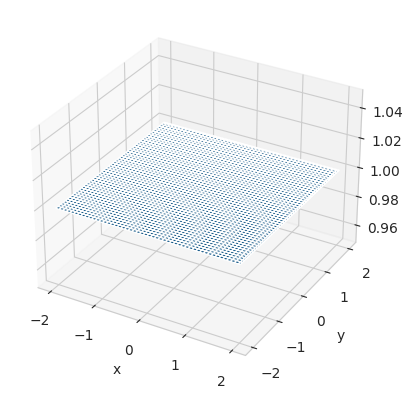

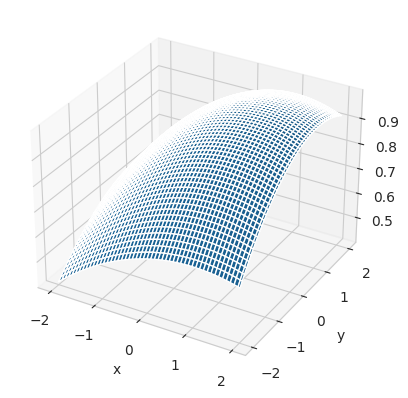

In [7]:
new_c_w_distr = c_w_distribution
loss_history = []
residual_history = []
c_size = 128
w_size = 128
big_steps = 10
fig, axs = plt.subplots(ncols=2)
for i in tqdm(range(big_steps)):
    z = lambda: epsilon.rvs() / (i + 1)
    if i % 1 == 0:
        new_c_w_distr, loss, residual = dynamic_system_iterate_u(model, usefulness, z, new_c_w_distr, u_pred_case=2,
                                                                 c_size=c_size,
                                                                 w_size=w_size, topn=8,
                                                                 visualize_distributions=(i, axs))
    else:
        new_c_w_distr, loss, residual = dynamic_system_iterate_u(model, usefulness, z, new_c_w_distr, u_pred_case=2,
                                                                 c_size=c_size,
                                                                 w_size=w_size, topn=8)
    loss_history.append(loss)
    residual_history.append(residual)
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.show()

In [8]:
loss_history = np.array(loss_history).T

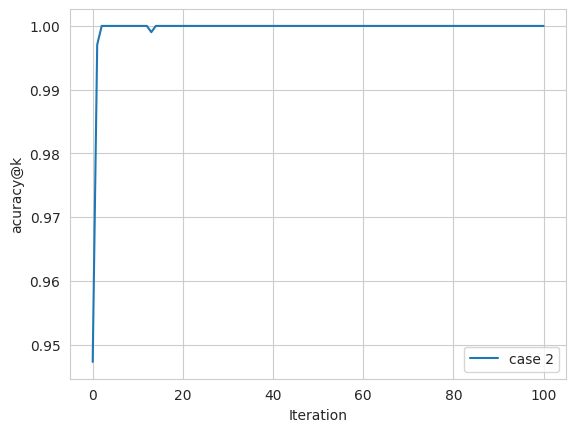

In [17]:

plt.plot(np.arange(big_steps), loss_history, label="case 2")
# plt.plot(np.arange(big_steps), loss_history[1], label="case 2")

plt.xlabel("Iteration")
plt.ylabel("acuracy@k")
plt.legend()
plt.show()

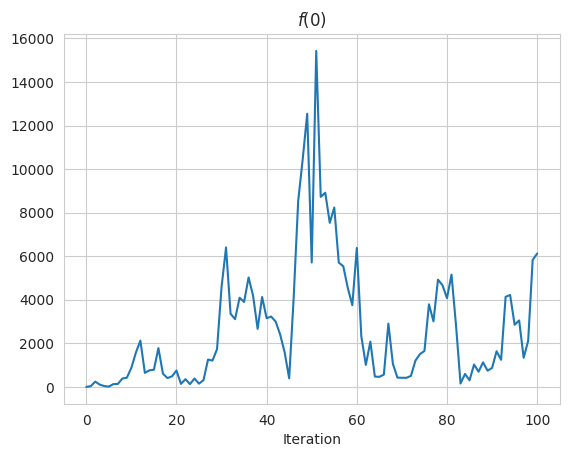

In [13]:
plt.plot(np.arange(big_steps), residual_history)
plt.xlabel("Iteration")
plt.title(r"$f(0)$")
# plt.title(r"$\frac{real \  feedback - predicted \ feedback} {num \ of \ predictions}$")
plt.show()

In [11]:
class Oracle:
    def recommend_topN(self, user_info, items_to_recommend, topn=10):
        n = min(topn, items_to_recommend.shape[0])
        res = np.array([usefulness(user_info["F"], items_to_recommend["F"].to_numpy(),
                                   epsilon.rvs(items_to_recommend.shape[0]))] * n)
        ids = np.argpartition(res, n - 1)
        return pd.DataFrame({"ItemId": ids[:n], "Rating": res[ids][:n]})

In [93]:
model = Oracle()

In [5]:
from models.CMF_Predictor import CMFRecommender, dynamic_system_iterate_CMF

start_c_size = 128
start_w_size = 128

user_info = pd.DataFrame({"F": customer_distribution.rvs(size=start_c_size)})  # генерим датасет для нулевой итерации
user_info["UserId"] = np.arange(start_c_size)

item_info = pd.DataFrame({"F": w_distribution.rvs(size=start_w_size)})
item_info["ItemId"] = np.arange(start_w_size)
feedback = []

for i, user_row in user_info.iterrows():
    for j, item_row in item_info.iterrows():
        deal = sps.bernoulli.rvs(usefulness(user_row["F"], item_row["F"], epsilon.rvs()))
        feedback.append((user_row["UserId"], item_row["ItemId"], deal))


In [6]:
# feedback = pd.DataFrame(feedback, columns=['UserId', 'ItemId', 'Feedback'])

model = CMFRecommender(capacity=1000000, num_of_factors=300)
model.fit(feedback, user_info, item_info)

100%|██████████| 101/101 [30:54<00:00, 18.36s/it]
/tmp/ipykernel_30338/4167953104.py:26: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


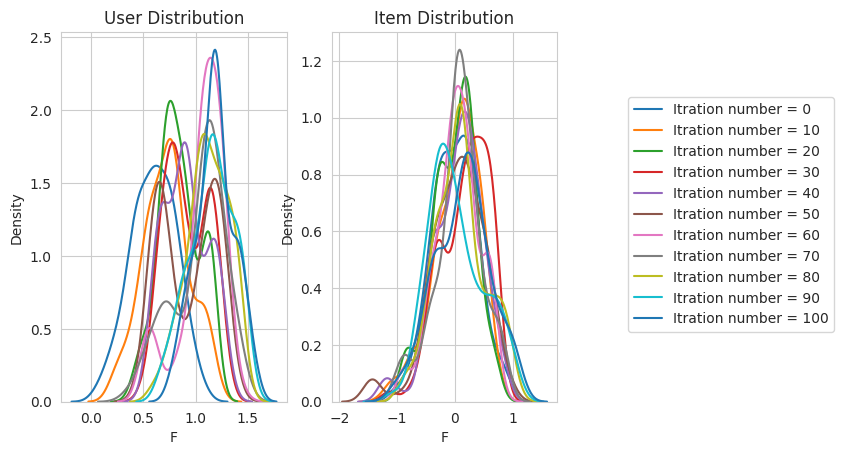

In [7]:
new_cust_distr, new_w_distr = customer_distribution, w_distribution
loss_history = []
residual_history = []
c_size = 128
w_size = 256
big_steps = 101
fig, axs = plt.subplots(ncols=2)
for i in tqdm(range(big_steps)):
    if i % 10 == 0:
        new_cust_distr, new_w_distr, loss, residual = dynamic_system_iterate_CMF(model, usefulness,
                                                                                 epsilon.rvs() / (i + 1),
                                                                                 new_cust_distr,
                                                                                 new_w_distr,
                                                                                 c_size=c_size,
                                                                                 w_size=w_size, topn=8,
                                                                                 delta=1e10,
                                                                                 visualize_distributions=(i, axs))
    else:
        new_cust_distr, new_w_distr, loss, residual = dynamic_system_iterate_CMF(model, usefulness,
                                                                                 epsilon.rvs() / (i + 1),
                                                                                 new_cust_distr,
                                                                                 new_w_distr,
                                                                                 c_size=c_size,
                                                                                 w_size=w_size, topn=8, delta=1e10)
    loss_history.append(loss)
    residual_history.append(residual)
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.show()

In [8]:
loss_history = np.array(loss_history).T

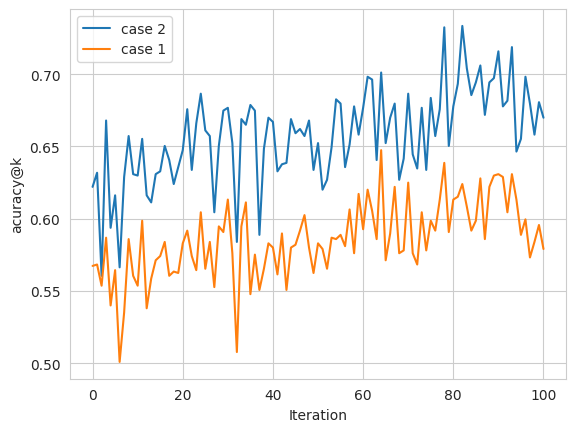

In [9]:
plt.plot(np.arange(big_steps), loss_history[0], label="case 2")
plt.plot(np.arange(big_steps), loss_history[1], label="case 1")

plt.xlabel("Iteration")
plt.ylabel("acuracy@k")
plt.legend()
plt.show()


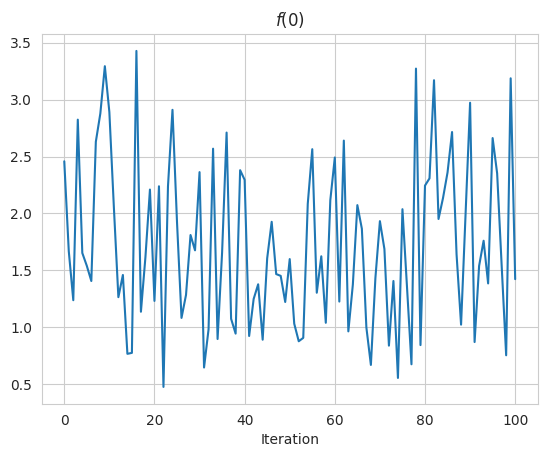

In [10]:
plt.plot(np.arange(big_steps), residual_history)
plt.xlabel("Iteration")
plt.title(r"$f(0)$")
# plt.title(r"$\frac{real \  feedback - predicted \ feedback} {num \ of \ predictions}$")
plt.show()